# LSTM_Archi #1



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

my_csv = "/content/drive/MyDrive/AyaShibbi_SeniorProject_2024_LIU/Part2_Emotion_Detection/Datasets/Unbalanced/Preprocessed_Text/NewDataset/unbalanced_lemmatized_text_ds.csv"

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# load the dataset from the CSV file into a pandas DataFrame
csv = pd.read_csv(my_csv)
df = pd.DataFrame(csv)

### Exploratory Data Analysis (EDA)

In [ ]:
# view all data in the dataframe
print(df)

                                                    text  label description  \
0      @mitchelmusso!!! Tell us your experience! I Lo...      5    surprise   
1       im feeling generous ill give you a story as well      2        love   
2      i feel vulnerable when im alone not only becau...      4        fear   
3      i just want to warn you that im feeling rather...      2        love   
4      i set off to drive back to derbyshire on frida...      0         sad   
...                                                  ...    ...         ...   
17897  i feel whos work is worthwhile in this world a...      1         joy   
17898  i keep reading contracts as cataracts... Someo...      4        fear   
17899  i feel as if i must blog constantly for all my...      2        love   
17900  i wonder if they will even think back to the t...      2        love   
17901  i feel everything intensely and emotional and ...      0         sad   

                                           filtered

In [ ]:
# information about the data
print(df.info)

<bound method DataFrame.info of                                                     text  label description  \
0      @mitchelmusso!!! Tell us your experience! I Lo...      5    surprise   
1       im feeling generous ill give you a story as well      2        love   
2      i feel vulnerable when im alone not only becau...      4        fear   
3      i just want to warn you that im feeling rather...      2        love   
4      i set off to drive back to derbyshire on frida...      0         sad   
...                                                  ...    ...         ...   
17897  i feel whos work is worthwhile in this world a...      1         joy   
17898  i keep reading contracts as cataracts... Someo...      4        fear   
17899  i feel as if i must blog constantly for all my...      2        love   
17900  i wonder if they will even think back to the t...      2        love   
17901  i feel everything intensely and emotional and ...      0         sad   

                   

In [ ]:
# view columns
print(df.columns)

Index(['text', 'label', 'description', 'filtered_text', 'lemmatized_text'], dtype='object')


In [ ]:
# number of records and features
print(df.shape)

(17902, 5)


In [ ]:
# number of null values
print(df.isnull().sum())

text                0
label               0
description         0
filtered_text      10
lemmatized_text    10
dtype: int64


In [ ]:
# Check for null values
if df.isnull().values.any():
  df.dropna(inplace=True)

In [ ]:
# number of null values
print(df.isnull().sum())

text               0
label              0
description        0
filtered_text      0
lemmatized_text    0
dtype: int64


In [ ]:
# view first 5 rows
print(df.head())

                                                text  label description  \
0  @mitchelmusso!!! Tell us your experience! I Lo...      5    surprise   
1   im feeling generous ill give you a story as well      2        love   
2  i feel vulnerable when im alone not only becau...      4        fear   
3  i just want to warn you that im feeling rather...      2        love   
4  i set off to drive back to derbyshire on frida...      0         sad   

                                       filtered_text  \
0                   tell us experience loveeeee youu   
1            im feeling generous ill give story well   
2  feel vulnerable im alone feel incapable defend...   
3  want warn im feeling rather delicate moment do...   
4  set drive back derbyshire friday afternoon fel...   

                                     lemmatized_text  
0                    tell u experience loveeeee youu  
1            im feeling generous ill give story well  
2  feel vulnerable im alone feel incapable defe

In [ ]:
# view last 5 rows
print(df.tail())

                                                    text  label description  \
17897  i feel whos work is worthwhile in this world a...      1         joy   
17898  i keep reading contracts as cataracts... Someo...      4        fear   
17899  i feel as if i must blog constantly for all my...      2        love   
17900  i wonder if they will even think back to the t...      2        love   
17901  i feel everything intensely and emotional and ...      0         sad   

                                           filtered_text  \
17897  feel whos work worthwhile world actually makes...   
17898  keep reading contracts cataracts someone bring...   
17899  feel must blog constantly loyal fans baker thi...   
17900  wonder even think back times begged side offer...   
17901  feel everything intensely emotional physical d...   

                                         lemmatized_text  
17897   feel who work worthwhile world actually make cry  
17898  keep reading contract cataract someone 

In [ ]:
# average word count
average_word_count = df['text'].str.split().str.len().mean()
print(f"Average Word Count per Text: {average_word_count:.2f}")

Average Word Count per Text: 17.92


In [ ]:
# emotion distribution
number_emotion_distribution = df['description'].value_counts()
percentage_emotion_distribution = df['description'].value_counts(normalize = True)

print(number_emotion_distribution) # numbers
print("-" * 30)
print(percentage_emotion_distribution) # percentages

description
joy         3000
fear        2999
sad         2999
love        2998
anger       2998
surprise    2898
Name: count, dtype: int64
------------------------------
description
joy         0.167673
fear        0.167617
sad         0.167617
love        0.167561
anger       0.167561
surprise    0.161972
Name: proportion, dtype: float64


#### Emotion Distribution Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

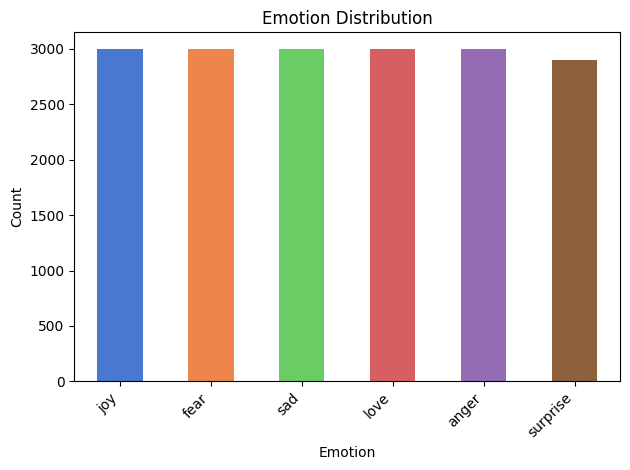

In [ ]:
# create the bar chart
number_emotion_distribution.plot(kind='bar', color=sns.color_palette("muted"))
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotion Distribution")
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for readability
plt.tight_layout()
plt.show()

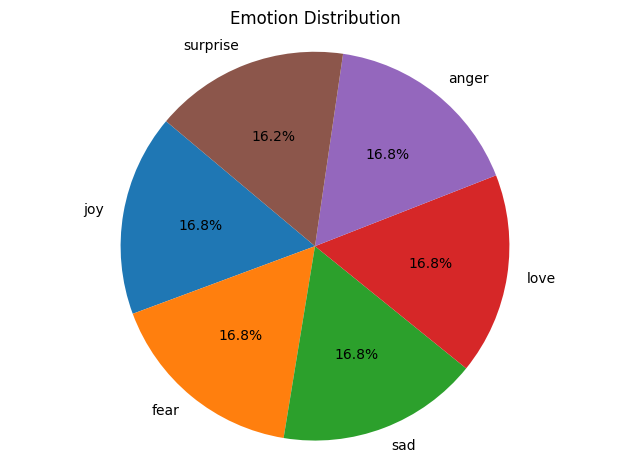

In [ ]:
# create the pie chart
plt.pie(percentage_emotion_distribution, labels=percentage_emotion_distribution.index, autopct="%1.1f%%", startangle=140)
plt.title("Emotion Distribution")
plt.axis('equal')  # equal aspect ratio for a circular pie chart
plt.tight_layout()
plt.show()

#### Overall Text Length Distribution

In [ ]:
# text length for each text (count characters)
text_lengths = df['filtered_text'].str.len()

print(text_lengths[:5])

0     32
1     39
2     76
3     60
4    162
Name: filtered_text, dtype: int64


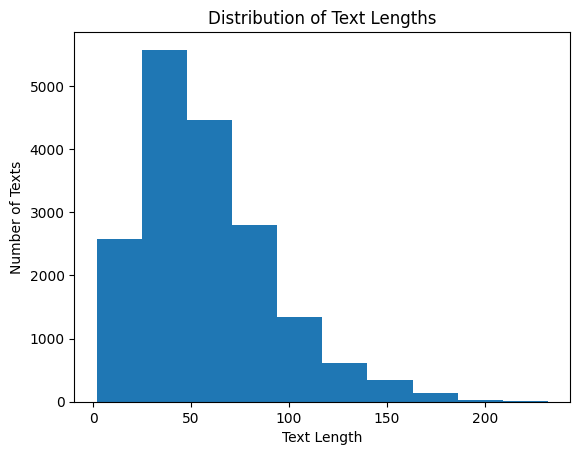

In [ ]:
# Create the histogram
plt.hist(text_lengths)
plt.xlabel("Text Length")
plt.ylabel("Number of Texts")
plt.title("Distribution of Text Lengths")
plt.show()

In [ ]:
# print the mean text length (count characters)
mean_text_length = text_lengths.mean()
print(f"Mean Text Length: {mean_text_length:.2f}")

Mean Text Length: 57.71


<ipython-input-21-2af9cc181816>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(text_lengths)


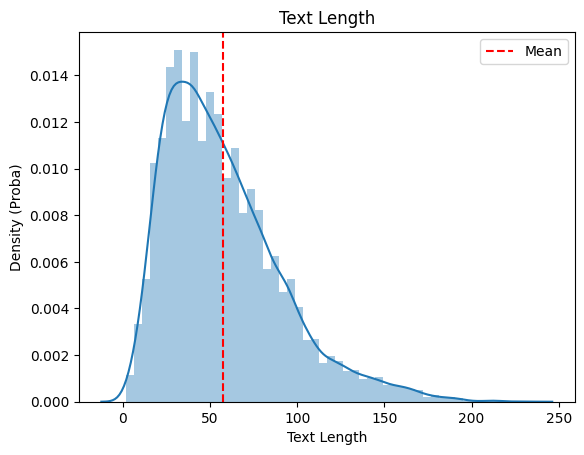

In [ ]:
# Create the distplot of Text Length
sns.distplot(text_lengths)
plt.xlabel('Text Length')
plt.ylabel('Density (Proba)')
plt.title('Text Length')
plt.axvline(mean_text_length, color='r', linestyle='dashed', linewidth=1.5, label='Mean')
plt.legend()
plt.show()

#### Word Frequency Per Text

In [ ]:
# find the text length and word count of each record
text_word_count = df['filtered_text'].apply(lambda x: len(str(x).split())) # words

print(text_word_count[:5])

0     5
1     7
2    12
3    10
4    24
Name: filtered_text, dtype: int64


In [ ]:
# print the mean text word count
mean_text_word_count = text_word_count.mean()
print(f"Mean Text Word Count: {mean_text_word_count:.2f}")

Mean Text Word Count: 8.96


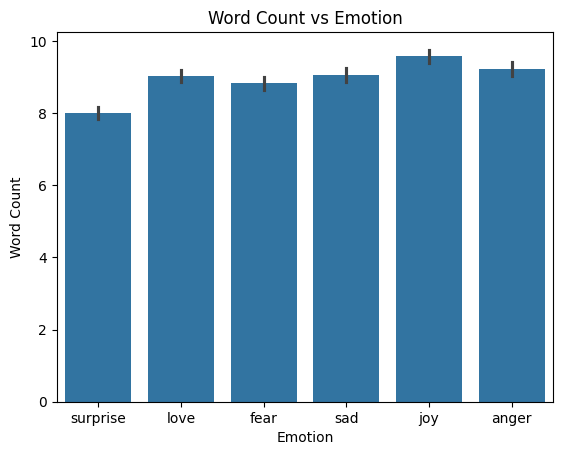

In [ ]:
# Create the barplot of Text Word Count
sns.barplot(x = df['description'], y = text_word_count)
plt.xlabel('Emotion')
plt.ylabel('Word Count')
plt.title('Word Count vs Emotion')
plt.show()

#### **Tokenization**

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# tokenization
tokenized_text = []

for sentence in df['filtered_text']:
  tokens = nltk.word_tokenize(sentence)
  tokenized_text.append(tokens)

print(tokenized_text[:5])

[['tell', 'us', 'experience', 'loveeeee', 'youu'], ['im', 'feeling', 'generous', 'ill', 'give', 'story', 'well'], ['feel', 'vulnerable', 'im', 'alone', 'feel', 'incapable', 'defending', 'also', 'could', 'go', 'labour', 'point'], ['want', 'warn', 'im', 'feeling', 'rather', 'delicate', 'moment', 'dont', 'expect', 'much'], ['set', 'drive', 'back', 'derbyshire', 'friday', 'afternoon', 'felt', 'emotional', 'suddenly', 'didnt', 'want', 'leave', 'funny', 'feeling', 'homesick', 'place', 'youre', 'even', 'county', 'borders', 'make', 'going', 'back', 'special']]


#### Word Frequency vs. Emotion

In [ ]:
from collections import Counter
def get_word_frequencies(text_list):
  word_counts = Counter()
  for text in text_list:
    word_counts.update(text)
  return word_counts

# Get word frequencies for all text
word_freqs = get_word_frequencies(tokenized_text)

print(word_freqs)

Counter({'feel': 9303, 'feeling': 4444, 'like': 2662, 'im': 2262, 'really': 1019, 'know': 913, 'get': 866, 'time': 835, 'love': 786, 'little': 718, 'people': 669, 'one': 663, 'want': 656, 'would': 647, 'think': 641, 'day': 630, 'still': 627, 'going': 607, 'good': 566, 'bit': 542, 'even': 531, 'much': 514, 'go': 505, 'ive': 505, 'life': 499, 'make': 484, 'back': 476, 'dont': 471, 'something': 465, 'see': 463, 'could': 460, 'way': 451, 'things': 449, 'got': 441, 'need': 430, 'today': 407, 'work': 404, 'right': 374, 'say': 344, 'always': 333, 'pretty': 331, 'also': 312, 'around': 309, 'cant': 309, 'well': 305, 'feels': 300, 'though': 296, 'feelings': 292, 'new': 287, 'made': 277, 'happy': 277, 'last': 275, 'never': 269, 'someone': 268, 'quot': 267, 'home': 267, 'didnt': 261, 'days': 255, 'help': 248, 'getting': 242, 'look': 240, 'every': 237, 'felt': 236, 'come': 234, 'find': 234, 'take': 232, 'sure': 229, 'left': 229, 'better': 226, 'many': 226, 'oh': 226, 'makes': 224, 'night': 222, 'lo

In [ ]:
# Group words by emotion
emotion_word_freqs = {}
for emotion in df['description'].unique():
  df_emotion = df[df['description'] == emotion]
  emotion_word_freqs[emotion] = get_word_frequencies(tokenized_text)

# Prepare data for visualization (adjust based on your needs)
top_n_words = 10  # Number of top words to visualize
emotions = list(emotion_word_freqs.keys())

word_data = []
for emotion, word_freq in emotion_word_freqs.items():
  top_words = word_freq.most_common(top_n_words)  # Get top words for this emotion
  word_data.append([word for word, _ in top_words])  # Extract just words

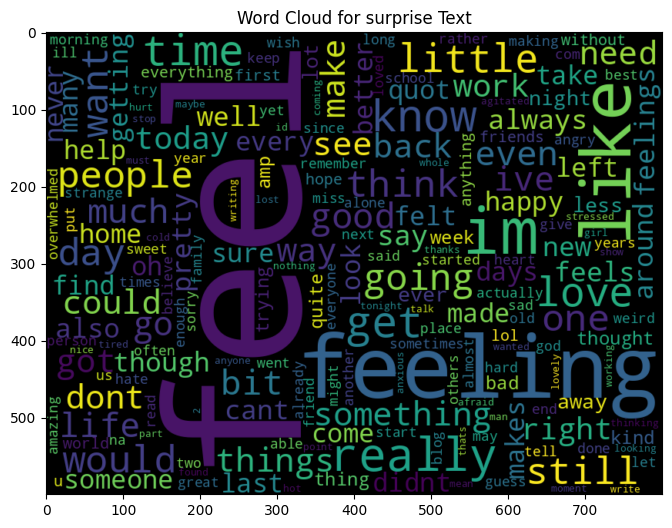

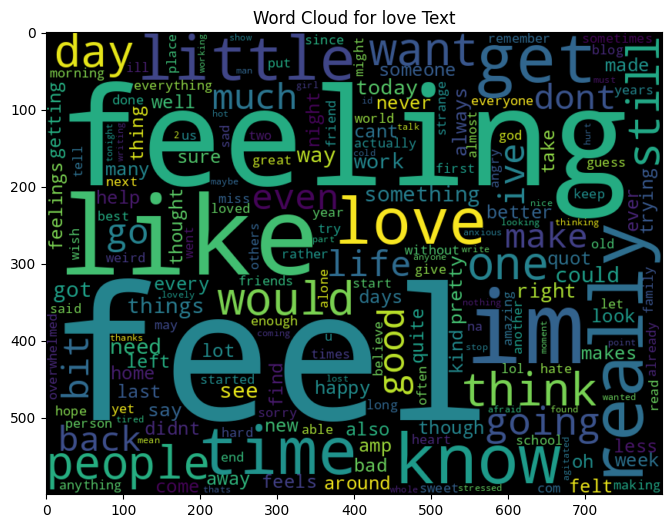

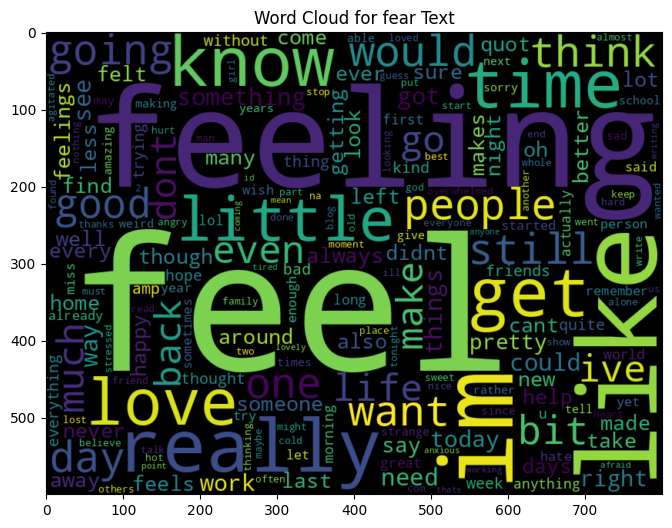

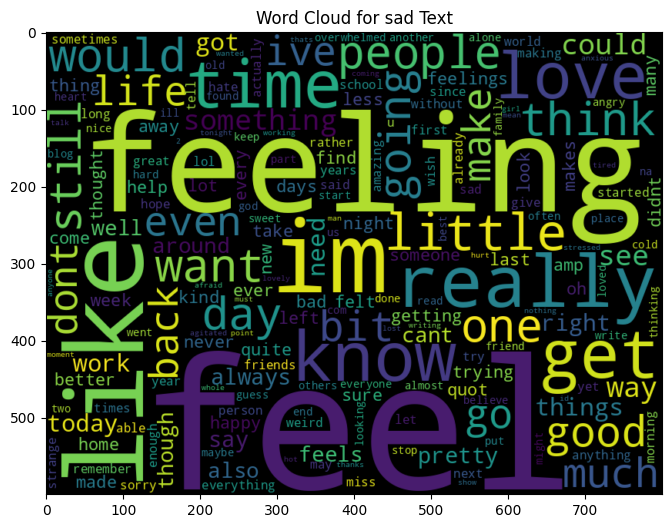

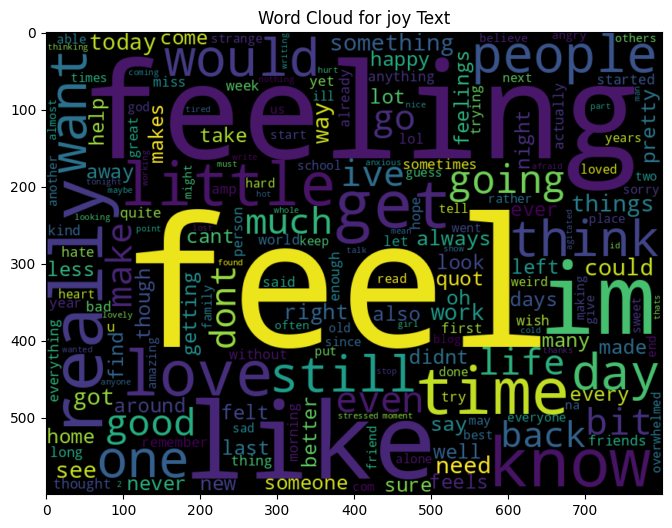

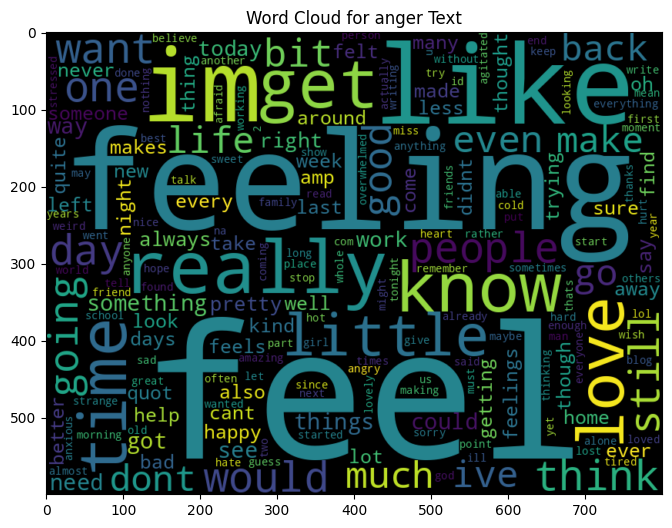

In [ ]:
from wordcloud import WordCloud

# Create word clouds for each emotion
for emotion, word_freq in emotion_word_freqs.items():
  word_cloud = WordCloud(width=800, height=600).generate_from_frequencies(word_freq)
  plt.figure(figsize=(8, 6))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.title(f'Word Cloud for {emotion} Text')
  plt.show()

#### N-Gram Analysis

In [ ]:
# creating individual dataframes of different emotions
sadness = df[df['label']==0]['filtered_text']
joy = df[df['label']==1]['filtered_text']
love = df[df['label']==2]['filtered_text']
anger = df[df['label']==3]['filtered_text']
fear = df[df['label']==4]['filtered_text']
surprise = df[df['label']==5]['filtered_text']

In [ ]:
# code to calculate ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
# calculating unigrmas, bigrams and trigrams for all given emotions

sad_unigrams = get_top_n_gram(sadness.values,(1,1),7)[2:]
joy_unigrams= get_top_n_gram(joy.values,(1,1),7)[2:]
love_unigrams= get_top_n_gram(love.values,(1,1),7)[2:]
anger_unigrams= get_top_n_gram(anger.values,(1,1),7)[2:]
fear_unigrams= get_top_n_gram(fear.values,(1,1),7)[2:]
surprise_unigrams= get_top_n_gram(surprise.values,(1,1),7)[2:]



sad_bigrams = get_top_n_gram(sadness.values,(2,2),7)[2:]
joy_bigrams= get_top_n_gram(joy.values,(2,2),7)[2:]
love_bigrams= get_top_n_gram(love.values,(2,2),7)[2:]
anger_bigrams= get_top_n_gram(anger.values,(2,2),7)[2:]
fear_bigrams= get_top_n_gram(fear.values,(2,2),7)[2:]
surprise_bigrams= get_top_n_gram(surprise.values,(2,2),7)[2:]


sad_trigrams = get_top_n_gram(sadness.values,(3,3),7)[2:]
joy_trigrams= get_top_n_gram(joy.values,(3,3),7)[2:]
love_trigrams= get_top_n_gram(love.values,(3,3),7)[2:]
anger_trigrams= get_top_n_gram(anger.values,(3,3),7)[2:]
fear_trigrams= get_top_n_gram(fear.values,(3,3),7)[2:]
surprise_trigrams= get_top_n_gram(surprise.values,(3,3),7)[2:]

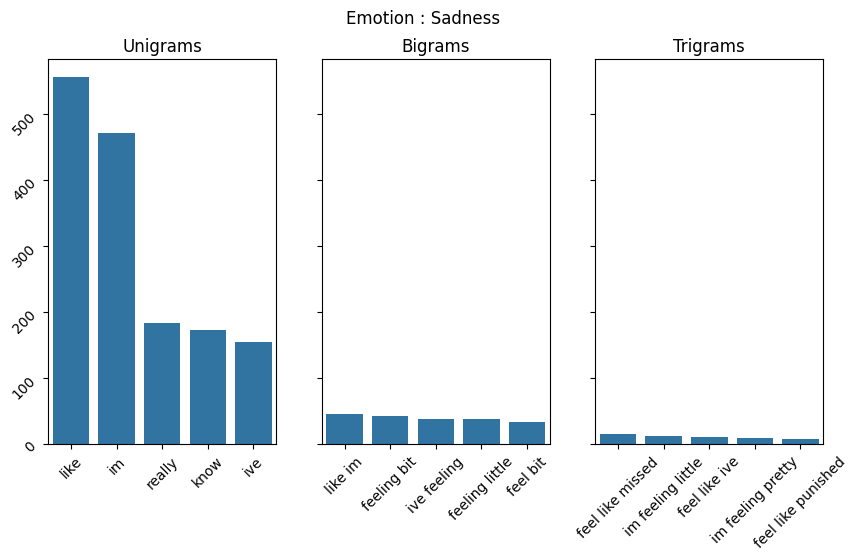

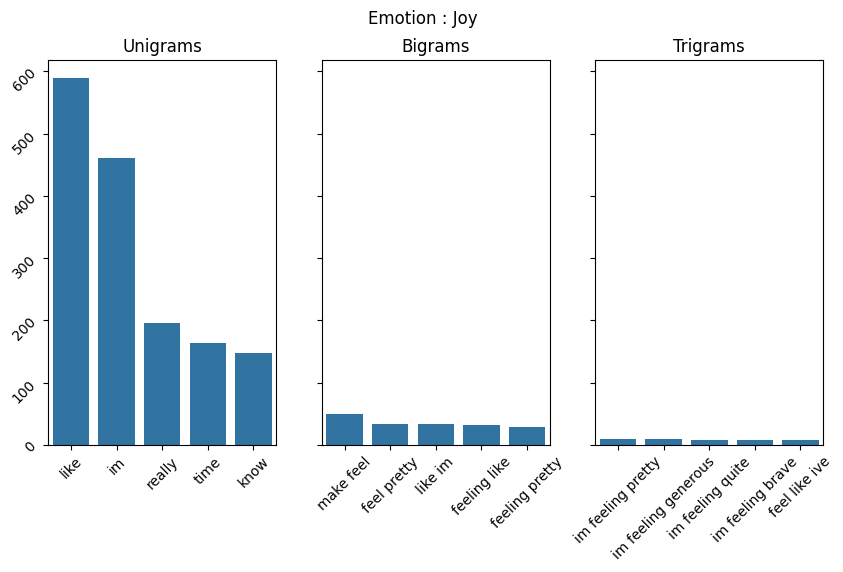

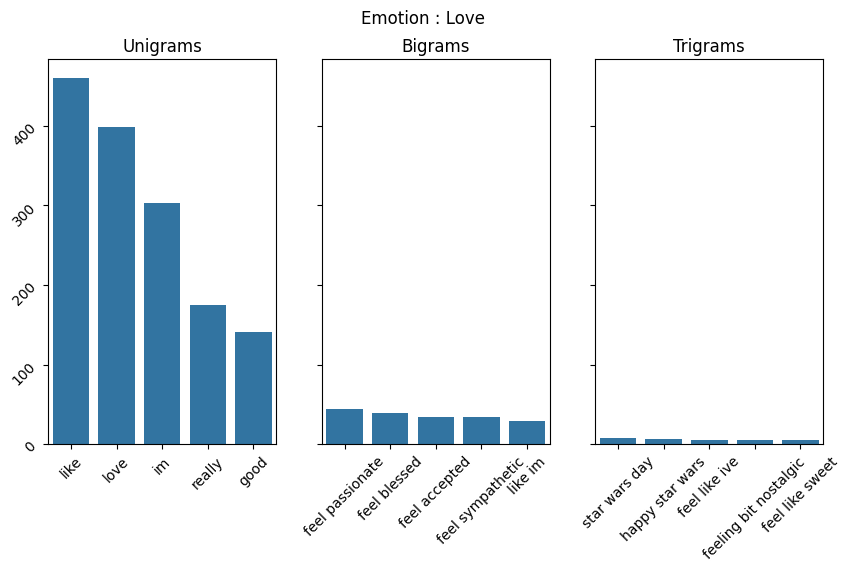

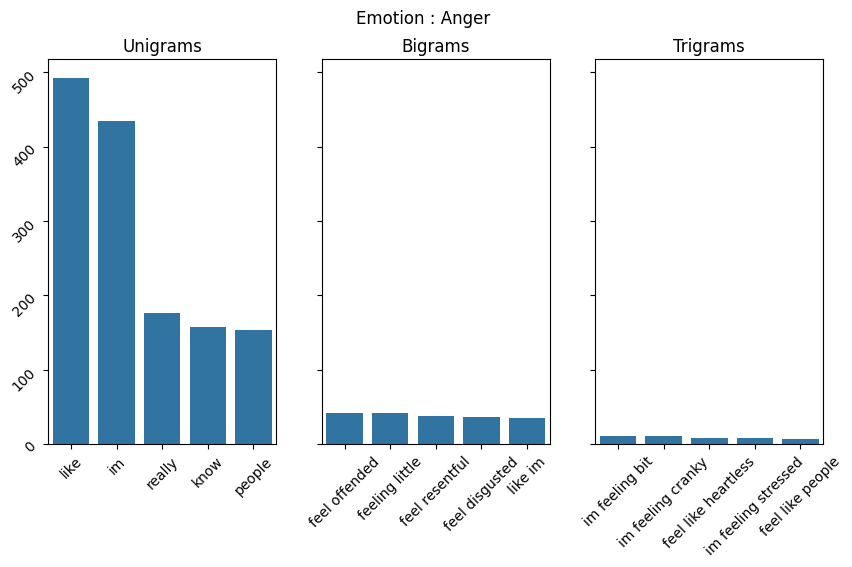

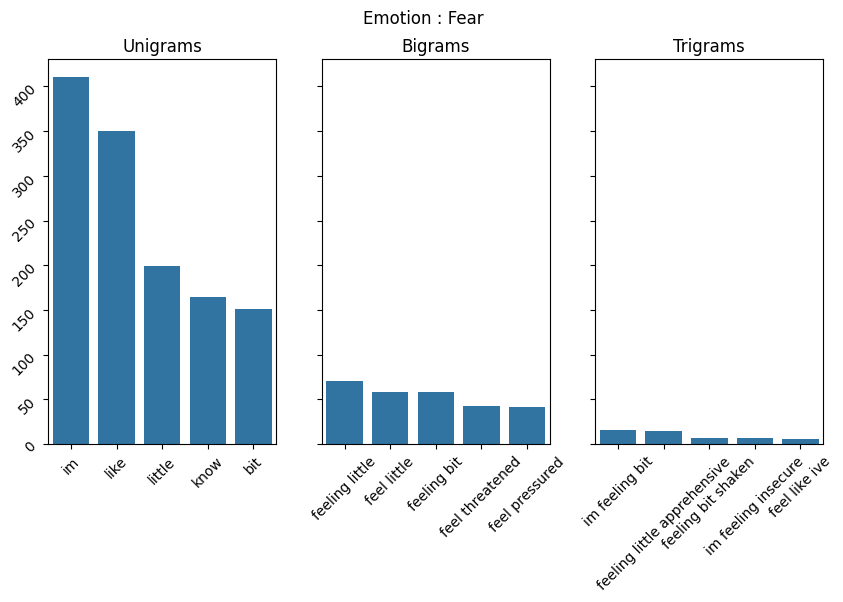

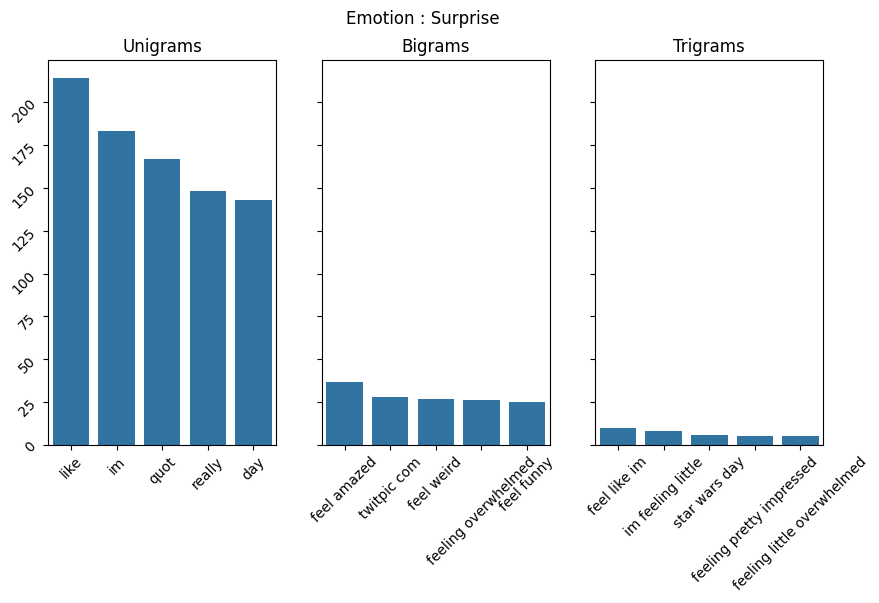

In [ ]:
# visualizing the ngrams for the emotions
#Sadness
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Sadness')



sns.barplot(x=list(dict(sad_unigrams).keys()), y=list(dict(sad_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)



sns.barplot(x=list(dict(sad_bigrams).keys()), y=list(dict(sad_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(sad_trigrams).keys()), y=list(dict(sad_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('sadness.png')


#Joy
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Joy')

sns.barplot(x=list(dict(joy_unigrams).keys()), y=list(dict(joy_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(joy_bigrams).keys()), y=list(dict(joy_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(joy_trigrams).keys()), y=list(dict(joy_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('joy.png')

#Love
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Love')

sns.barplot(x=list(dict(love_unigrams).keys()), y=list(dict(love_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(love_bigrams).keys()), y=list(dict(love_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(love_trigrams).keys()), y=list(dict(love_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#Anger
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Anger')

sns.barplot(x=list(dict(anger_unigrams).keys()), y=list(dict(anger_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(anger_bigrams).keys()), y=list(dict(anger_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(anger_trigrams).keys()), y=list(dict(anger_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#Fear
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Fear')

sns.barplot(x=list(dict(fear_unigrams).keys()), y=list(dict(fear_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(fear_bigrams).keys()), y=list(dict(fear_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(fear_trigrams).keys()), y=list(dict(fear_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('fear.png')


#Surprise
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Surprise')

sns.barplot(x=list(dict(surprise_unigrams).keys()), y=list(dict(surprise_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(surprise_bigrams).keys()), y=list(dict(surprise_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(surprise_trigrams).keys()), y=list(dict(surprise_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('suprise.png')

### Building LSTM Model

To try the GloVe model, uncomment the first 2 cells, to be able to download it

In [ ]:
# !wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

In [ ]:
# !unzip glove.6B.zip

In [ ]:
import numpy as np
words = dict()

# filename == glove.6B.50d.txt
def add_to_dict(dictionary, filename):
  with open(filename, 'r') as file:
    for line in file.readlines():
      line = line.split(" ")

      try:
        dictionary[line[0]] = np.array(line[1:], dtype = float)
      except:
        continue

In [ ]:
add_to_dict(words, 'glove.6B.50d.txt')

In [ ]:
words

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01]),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.41634 , -0.15428 ,  0.1

In [ ]:
len(words)

29443

In [ ]:
sentences = df['filtered_text']

sentences

0                         tell us experience loveeeee youu
1                  im feeling generous ill give story well
2        feel vulnerable im alone feel incapable defend...
3        want warn im feeling rather delicate moment do...
4        set drive back derbyshire friday afternoon fel...
                               ...                        
17897    feel whos work worthwhile world actually makes...
17898    keep reading contracts cataracts someone bring...
17899    feel must blog constantly loyal fans baker thi...
17900    wonder even think back times begged side offer...
17901    feel everything intensely emotional physical d...
Name: filtered_text, Length: 17892, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# choosing words to vectorize
tokenizer = nltk.RegexpTokenizer(r"\w+")
def sentence_to_tokens(sent):
  tokens = tokenizer.tokenize(sent)
  tokenized_text = [t for t in tokens]
  tokenized_and_foundInDict_text = [t for t in tokenized_text if t in words]

  return tokenized_and_foundInDict_text

In [ ]:
import numpy as np

In [ ]:
# convert words to vectors
def sentence_to_vector(sentence, word_dict = words):
  tokenized_and_inDict = sentence_to_tokens(sentence)

  vectors = []
  for token in tokenized_and_inDict:
    if token not in word_dict:
      # if there is no vector for that word
      continue

    token_vector = word_dict[token] # else get its vector
    vectors.append(token_vector)

  return np.array(vectors, dtype = float)

In [ ]:
sentence_to_vector(sentences[0])

array([[ 0.27569  ,  0.11783  ,  0.37882  , -0.49723  ,  0.76888  ,
        -0.36292  , -0.54519  ,  0.65276  , -0.46172  , -0.14952  ,
        -0.38614  ,  0.79168  , -0.15403  , -0.058205 ,  1.1229   ,
         0.56527  ,  0.16595  , -0.077778 ,  0.64327  , -0.72984  ,
        -0.21189  ,  0.92225  ,  0.69001  ,  0.69599  ,  1.1019   ,
        -1.9937   , -1.2675   , -0.15723  ,  0.48296  , -1.2519   ,
         2.285    ,  0.46189  , -0.70236  , -0.47738  , -0.14543  ,
        -0.20278  ,  0.074301 , -0.36134  ,  0.38502  , -0.21962  ,
        -0.018846 ,  0.3053   ,  0.039375 ,  0.38343  ,  0.54826  ,
         0.06803  , -0.065348 ,  0.057069 , -0.12171  ,  0.79355  ],
       [ 0.19086  ,  0.24339  ,  1.2768   , -0.038207 ,  0.6094   ,
        -0.70188  ,  0.040862 , -0.44903  ,  0.0080416, -0.18819  ,
        -0.68578  , -0.12465  , -0.32855  , -0.073507 ,  0.79112  ,
         0.31981  ,  0.081126 , -0.033057 , -0.6007   ,  0.014536 ,
         0.42773  ,  0.71318  ,  0.13327  , -0.

In [ ]:
sentence_to_vector(sentences[0]).shape

(3, 50)

In [ ]:
# train model on training set
# evaluate performance on validation set
# final model evaluation on test set

train_df = df.sample(frac=1, random_state=46)
train_df.reset_index(drop=True, inplace=True)

# the first 70% of the rows go to training df
split_index_1 = int(len(train_df) * 0.7)

# the next 15% (from 70 to 85) go to validation df
split_index_2 = int(len(train_df) * 0.85)

# and last 15% go to test df

train_df, val_df, test_df = train_df[:split_index_1], train_df[split_index_1:split_index_2], train_df[split_index_2:]

len(train_df), len(val_df), len(test_df)

(12524, 2684, 2684)

In [ ]:
def df_to_X_y(df):
  y = df['label'].to_numpy().astype(int)

  all_word_vector_sequences = [] # inputs(X)
  for sentence in df['filtered_text']:
    sentence_as_vector_sequence = sentence_to_vector(sentence)

    if sentence_as_vector_sequence.shape[0] == 0:
      # shape == (no.1, no.2), so if no.1 == 0 ==> no usable tokens in sentence
      sentence_as_vector_sequence = np.zeros(shape = (1, 50))

    all_word_vector_sequences.append(sentence_as_vector_sequence)
    # what I want to, but currently can't is converting all_word_vector_sequences into numpy array
    # I can't do that, since different sentences will have different sequence length
    # => will have a different number of tokens in each sentence

  return all_word_vector_sequences, y

In [ ]:
X_train, y_train = df_to_X_y(train_df)

print(len(X_train))

12524


(array([3126., 3469., 2665., 1677.,  834.,  393.,  233.,   91.,   23.,
          13.]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <BarContainer object of 10 artists>)

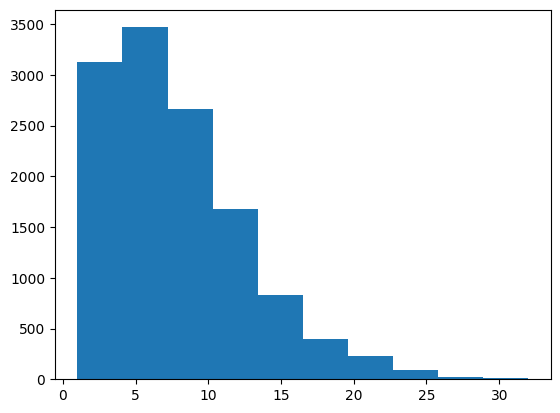

In [ ]:
sequence_lengths = []
for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

import matplotlib.pyplot as plt
plt.hist(sequence_lengths)

In [ ]:
series = pd.Series(sequence_lengths).describe()

series

count    12524.000000
mean         8.082721
std          4.724345
min          1.000000
25%          5.000000
50%          7.000000
75%         11.000000
max         32.000000
dtype: float64

In [ ]:
max_value = series["max"]

max_value = (int)(max_value)

max_value

32

In [ ]:
from copy import deepcopy

max_value += 5


def pad_X(X, desired_sequence_length=max_value):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    # i = index, starting from 0,
    # x = sequence of vectors in X
    x_seq_len = x.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len # how many zero vectors we need to pad

    pad = np.zeros(shape=(sequence_length_difference, 50)) # 50 --> dimension of glove model

    X_copy[i] = np.concatenate([x, pad])

  return np.array(X_copy).astype(float)

In [ ]:
X_train = pad_X(X_train)

X_train.shape

(12524, 37, 50)

In [ ]:
y_train.shape

(12524,)

In [ ]:
X_val, y_val = df_to_X_y(val_df)
X_val = pad_X(X_val)

X_val.shape, y_val.shape

((2684, 37, 50), (2684,))

In [ ]:
X_test, y_test = df_to_X_y(test_df)
X_test = pad_X(X_test)

X_test.shape, y_test.shape

((2684, 37, 50), (2684,))

In [ ]:
# train LSTM model
import tensorflow as tf
from keras import layers
from keras.layers import LSTM
from keras.models import Sequential
from keras.regularizers import l2

model = Sequential()
model.add(layers.Input(shape=(max_value, 50)))
model.add(layers.LSTM(64, return_sequences=True, kernel_regularizer=l2(0.05)))
model.add(layers.Dropout(0.5)) # regularization to avoid overfitting
model.add(layers.Flatten())
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 37, 64)            29440     
                                                                 
 dropout (Dropout)           (None, 37, 64)            0         
                                                                 
 flatten (Flatten)           (None, 2368)              0         
                                                                 
 dense (Dense)               (None, 6)                 14214     
                                                                 
Total params: 43654 (170.52 KB)
Trainable params: 43654 (170.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint('model/', monitor='accuracy', save_best_only=True, verbose=1)


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss = "categorical_crossentropy",
              metrics=['accuracy']
              )

In [ ]:
from keras.utils import to_categorical

# Convert the true labels to one-hot vectors
y_val_one_hot = to_categorical(y_val, num_classes=6)
# Convert the true labels to one-hot vectors
y_train_one_hot = to_categorical(y_train, num_classes=6)

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot), epochs=150, callbacks=[cp, early_stopping])

Epoch 1/150
391/392 [============================>.] - ETA: 0s - loss: 4.5831 - accuracy: 0.2268
Epoch 1: accuracy improved from -inf to 0.22708, saving model to model/
392/392 [==============================] - 17s 38ms/step - loss: 4.5819 - accuracy: 0.2271 - val_loss: 3.4343 - val_accuracy: 0.2880
Epoch 2/150
392/392 [==============================] - ETA: 0s - loss: 2.8367 - accuracy: 0.3180
Epoch 2: accuracy improved from 0.22708 to 0.31803, saving model to model/
392/392 [==============================] - 15s 39ms/step - loss: 2.8367 - accuracy: 0.3180 - val_loss: 2.3422 - val_accuracy: 0.3402
Epoch 3/150
392/392 [==============================] - ETA: 0s - loss: 2.1076 - accuracy: 0.3405
Epoch 3: accuracy improved from 0.31803 to 0.34047, saving model to model/
392/392 [==============================] - 14s 37ms/step - loss: 2.1076 - accuracy: 0.3405 - val_loss: 1.8986 - val_accuracy: 0.3461
Epoch 4/150
392/392 [==============================] - ETA: 0s - loss: 1.8106 - accuracy

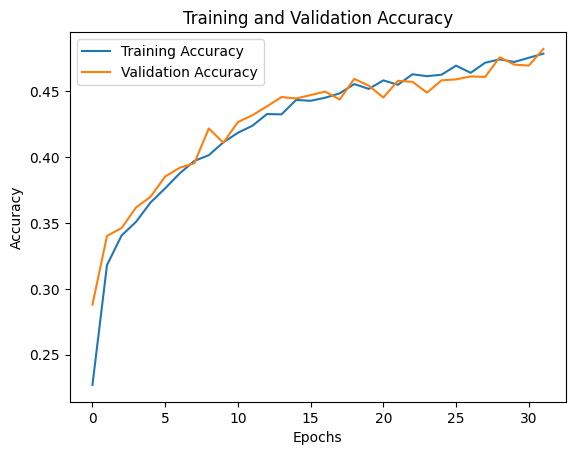

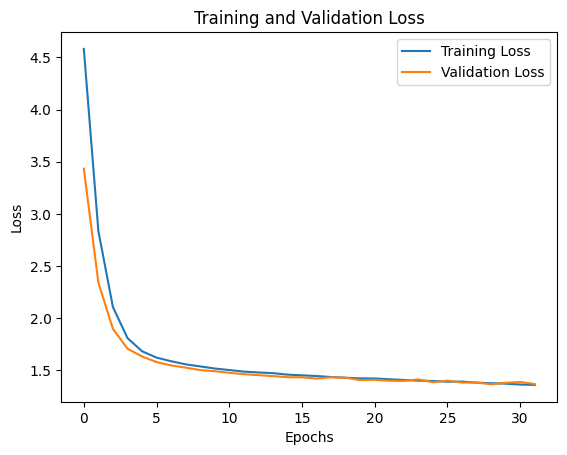

In [ ]:
# Import libraries
import matplotlib.pyplot as plt

# Retrieve accuracy and loss history from training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the number of epochs
epochs_range = range(len(loss))  # Get the number of epochs trained for

# Accuracy
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Loss
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
best_model = load_model('model/')

In [ ]:
test_predictions = (best_model.predict(X_test) > 0.5).astype(int)

y_test_one_hot = to_categorical(y_test, num_classes=6)

from sklearn.metrics import classification_report

print(classification_report(y_test_one_hot, test_predictions))

84/84 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.63      0.23      0.34       435
           1       0.62      0.43      0.51       470
           2       0.61      0.11      0.19       457
           3       0.61      0.15      0.24       446
           4       0.56      0.22      0.32       438
           5       0.54      0.42      0.47       438

   micro avg       0.59      0.26      0.36      2684
   macro avg       0.60      0.26      0.35      2684
weighted avg       0.60      0.26      0.35      2684
 samples avg       0.26      0.26      0.26      2684



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_one_hot)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

84/84 [==============================] - 1s 9ms/step - loss: 1.3850 - accuracy: 0.4721
Test Loss: 1.3849765062332153
Test Accuracy: 0.47205662727355957


In [ ]:
import nltk
nltk.download('wordnet')

# Preprocess the input sentences
input_sentences = ["I pass an examination which I did not think I did well.",
                   "I am out in the dark and a suspicious looking character comes towards me.",
                   "I felt very happy when I won the football pools.",
                   "This issue worried me rather than saddening me.",
                   "In September 1984, I was forced to live with someone I did not like. The atmosphere was very bad.",
                   "Two months ago, my leg started hurting a little. And since then the pain has grown more, and now I can barely move.",
                   ]
# joy, fear, joy, sadness, anger


tokenizer = nltk.RegexpTokenizer(r"\w+")
word_vectors = []

for sentence in input_sentences:
    tokens = tokenizer.tokenize(sentence)
    tokenized_and_foundInDict_text = [t for t in tokens if t in words]
    if len(tokenized_and_foundInDict_text) > 0:
        vector = sentence_to_vector(sentence, word_dict=words)
        word_vectors.append(vector)
    else:
        print(f"Could not find any words in the input sentence: {sentence}")

# Pad the input sequences
padded_word_vectors = pad_X(word_vectors)

# Make predictions using the trained LSTM model
predictions = best_model.predict(padded_word_vectors)
print(predictions)
print("-" * 30)
percentages = predictions / np.sum(predictions, axis=1)[:, np.newaxis] * 100
print(percentages)
print("-" * 30)
percentages = np.rint(percentages)
print(percentages)

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Print the predictions
for i, sentence in enumerate(input_sentences):
    print(f"Sentence: {sentence}")
    pLabel = predicted_labels[i]
    if pLabel == 0:
      print(f"Predicted label: Sadness")
    elif pLabel == 1:
      print(f"Predicted label: Joy")
    elif pLabel == 2:
      print(f"Predicted label: Love")
    elif pLabel == 3:
      print(f"Predicted label: Anger")
    elif pLabel == 4:
      print(f"Predicted label: Fear")
    else:
      print(f"Predicted label: Surprise")
    print()

1/1 [==============================] - 0s 25ms/step
[[0.02870693 0.04905768 0.12662984 0.10955783 0.24142869 0.444619  ]
 [0.08126599 0.19055907 0.14845085 0.17177159 0.20519012 0.20276238]
 [0.13988268 0.6282921  0.06031542 0.07332212 0.02827753 0.06991017]
 [0.23740706 0.06735978 0.12722088 0.28391162 0.17765856 0.10644204]
 [0.17914295 0.21592857 0.10084478 0.2194549  0.1539246  0.13070421]
 [0.3042772  0.20881888 0.07502639 0.22717221 0.13641065 0.04829463]]
------------------------------
[[ 2.870693   4.905768  12.662985  10.955783  24.142868  44.4619   ]
 [ 8.126598  19.055908  14.845085  17.177158  20.519012  20.276237 ]
 [13.988268  62.82921    6.031542   7.3322124  2.827753   6.991017 ]
 [23.740707   6.735979  12.72209   28.391165  17.765858  10.644205 ]
 [17.914295  21.592857  10.084477  21.94549   15.39246   13.070421 ]
 [30.427721  20.881887   7.5026393 22.71722   13.641066   4.8294635]]
------------------------------
[[ 3.  5. 13. 11. 24. 44.]
 [ 8. 19. 15. 17. 21. 20.]
 [

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
